In [ ]:
import cv2

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import utils
from keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
y_train[0]

5

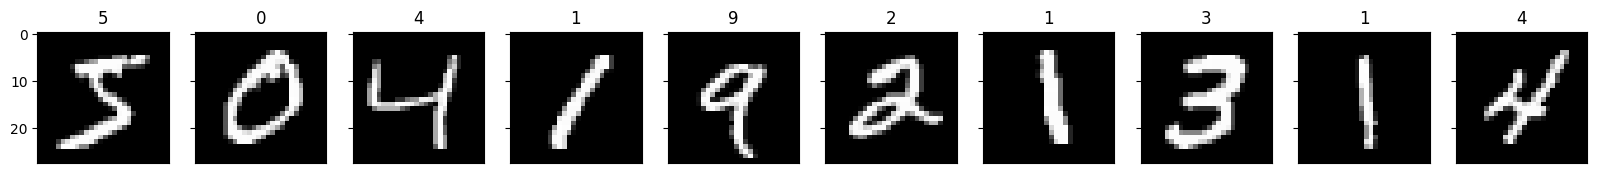

In [7]:
fig,axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20,4))
for i in range(10):
  axes[i].set_title(y_train[i])
  axes[i].imshow(X_train[i],cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_xaxis().set_visible(False)
plt.show()

In [10]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [12]:
X_train.shape     #60000 means training data points and 28,28 length and width while is rgb channel there is only one channe

(60000, 28, 28, 1)

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /=255     #Normalize values value will be between 0 and 1 now
X_test /=255

Y_train = to_categorical(y_train,10) #one hot encoding
Y_test= to_categorical(y_test,10)

In [31]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100, activation= 'relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation= 'softmax'))

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

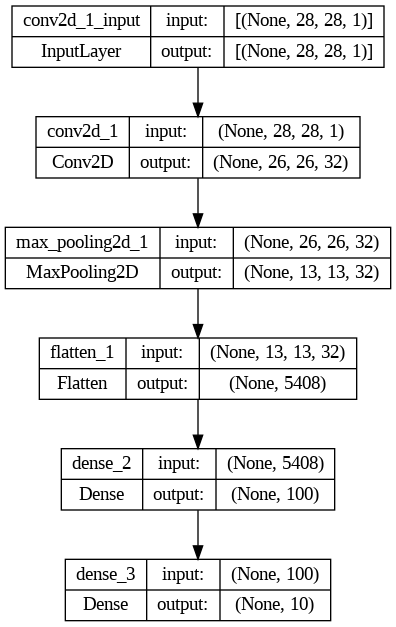

In [33]:
utils.plot_model(model,show_shapes=True)

In [34]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])



In [35]:
model.fit(X_train, Y_train, batch_size=32, epochs=2, verbose=1, validation_data= (X_test, Y_test))

Epoch 1/2
1875/1875 [==============================] - 38s 20ms/step - loss: 0.5784 - accuracy: 0.8388 - val_loss: 0.2814 - val_accuracy: 0.9182
Epoch 2/2
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2614 - accuracy: 0.9223 - val_loss: 0.2044 - val_accuracy: 0.9376


In [36]:
model.save('mnist_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


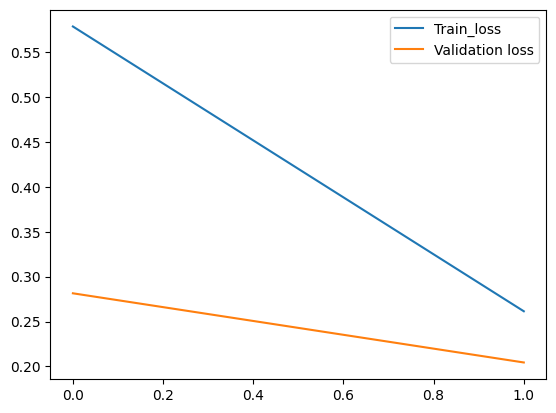

In [37]:
plt.plot(model.history.history['loss'], label='Train_loss')
plt.plot(model.history.history['val_loss'], label='Validation loss')
plt.legend()

In [38]:
model = keras.models.load_model('mnist_cnn_model.h5')


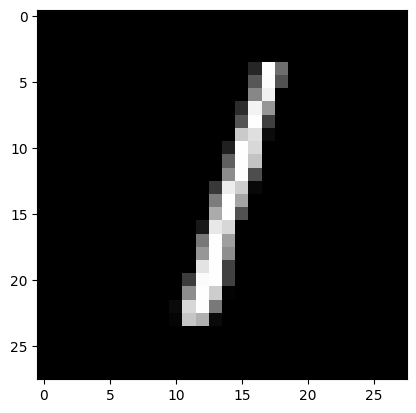

In [42]:
plt.imshow(X_test[2], cmap='gray')


In [52]:
x= np.reshape(X_test[2], (1,28,28,1))
np.argmax(model.predict(x))

1/1 [==============================] - 0s 32ms/step


1

In [53]:
model.predict(x)

1/1 [==============================] - 0s 145ms/step


array([[2.6916609e-06, 9.9278921e-01, 2.0871565e-03, 1.0312628e-03,
        8.1214443e-05, 2.8472015e-04, 7.3561433e-04, 9.4155170e-04,
        1.9099262e-03, 1.3668944e-04]], dtype=float32)